# Xử lý ảnh
* MSSV: 21522188
* họ và tên: Lê Duy Khang

In [2]:
%env url_prefix https://github.com/opencv/opencv/raw/master/data/haarcascades
%env nodeurl_prefix https://raw.githubusercontent.com/peterbraden/node-opencv/master/data
!mkdir local
!wget -P local $nodeurl_prefix/haarcascade_eye.xml
!wget -P local $nodeurl_prefix/haarcascade_mcs_mouth.xml
!wget -P local $nodeurl_prefix/haarcascade_mcs_nose.xml
!wget -P local $nodeurl_prefix/haarcascade_frontalface_default.xml
!wget -P local $url_prefix/haarcascade_smile.xml
!wget -P local https://raw.githubusercontent.com/andrewssobral/vehicle_detection_haarcascades/master/cars.xml
!wget -P local https://4.bp.blogspot.com/-kExvUPUGqHM/VgQqsginv6I/AAAAAAAAABY/XOEmZK_PgRU/s1600/dsc_0216.jpg
!gdown -O ./local/background-video-people-walking.mp4 1ATc89gCggqRtzRsMt8fOEyrfTZ1kd4z_
!wget -P local https://toolkit.climate.gov/sites/default/files/787NorthEnd.JPG
!wget -P local https://c.stocksy.com/a/0cK200/z9/555892.jpg



env: url_prefix=https://github.com/opencv/opencv/raw/master/data/haarcascades
env: nodeurl_prefix=https://raw.githubusercontent.com/peterbraden/node-opencv/master/data
--2024-06-07 00:23:02--  https://raw.githubusercontent.com/peterbraden/node-opencv/master/data/haarcascade_eye.xml
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 506314 (494K) [text/plain]
Saving to: ‘local/haarcascade_eye.xml’

haarcascade_eye.xml 100%[===================>] 494.45K   385KB/s    in 1.3s    

2024-06-07 00:23:05 (385 KB/s) - ‘local/haarcascade_eye.xml’ saved [506314/506314]

--2024-06-07 00:23:05--  https://raw.githubusercontent.com/peterbraden/node-opencv/master/data/haarcascade_mcs_mouth.xml
Loaded CA certificate '/e

### Dò tìm các feature của khuôn mặt: mắt, mũi, miệng của khuôn mặt.

In [3]:
import cv2
import matplotlib.pyplot as plt

In [4]:
# Improt model
eye_cascade = cv2.CascadeClassifier("local/haarcascade_eye.xml")
mouth_cascade = cv2.CascadeClassifier("local/haarcascade_mcs_mouth.xml")
nose_cascade = cv2.CascadeClassifier("local/haarcascade_mcs_nose.xml")
face_cascade = cv2.CascadeClassifier("local/haarcascade_frontalface_default.xml")

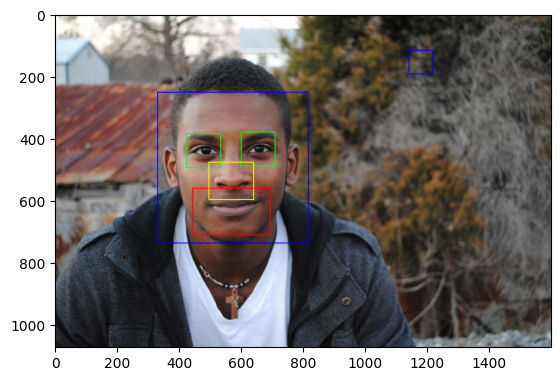

In [5]:
image = cv2.imread("local/dsc_0216.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.1, 10)


for x, y, w, h in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

    face_img = gray[y : (y + h), x : (x + w)]

    eyes = eye_cascade.detectMultiScale(face_img, 1.1, 10)
    mouth = mouth_cascade.detectMultiScale(face_img, 10, 10)
    nose = nose_cascade.detectMultiScale(face_img, 2, 10)

    for x1, y1, w1, h1 in eyes:
        new_x = x + x1
        new_y = y + y1
        cv2.rectangle(image, (new_x, new_y), (new_x + w1, new_y + h1), (0, 255, 0), 2)

    for x1, y1, w1, h1 in mouth:
        new_x = x + x1
        new_y = y + y1
        cv2.rectangle(image, (new_x, new_y), (new_x + w1, new_y + h1), (0, 0, 255), 2)

    for x1, y1, w1, h1 in nose:
        new_x = x + x1
        new_y = y + y1
        cv2.rectangle(image, (new_x, new_y), (new_x + w1, new_y + h1), (0, 255, 255), 2)

    

fimage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(fimage)

# Body full, upper, lower

## Image

In [6]:
full_body_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_fullbody.xml')
upper_body_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_upperbody.xml')
lower_body_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_lowerbody.xml')

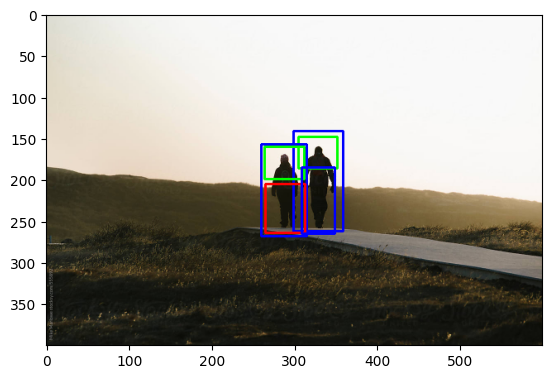

In [7]:
image = cv2.imread("local/555892.jpg")
image = cv2.resize(image, (0, 0), fx = 0.5, fy = 0.5)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

fbodies = full_body_cascade.detectMultiScale(gray)


for x, y, w, h in fbodies:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

    full_body_img = gray[y : (y + h), x : (x + w)]

    up_body = upper_body_cascade.detectMultiScale(full_body_img)
    low_body = lower_body_cascade.detectMultiScale(full_body_img)

    for x1, y1, w1, h1 in up_body:
        new_x = x + x1
        new_y = y + y1
        cv2.rectangle(image, (new_x, new_y), (new_x + w1, new_y + h1), (0, 255, 0), 2)

    for x1, y1, w1, h1 in low_body:
        new_x = x + x1
        new_y = y + y1
        cv2.rectangle(image, (new_x, new_y), (new_x + w1, new_y + h1), (0, 0, 255), 2)
    

fimage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(fimage)

## Video

In [8]:
video_capture = cv2.VideoCapture("./local/background-video-people-walking.mp4")
# video_capture = cv2.VideoCapture(0)
video_width = video_capture.get(3)
video_height = video_capture.get(4)


while True:
    ret, image = video_capture.read()

    if ret == False:
        break

    image = cv2.resize(image, (0, 0), fx = 0.5, fy = 0.5)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    fbodies = full_body_cascade.detectMultiScale(gray)

    for x, y, w, h in fbodies:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
        full_body_img = gray[y : (y + h), x : (x + w)]

        up_body = upper_body_cascade.detectMultiScale(full_body_img)
        low_body = lower_body_cascade.detectMultiScale(full_body_img)

        for x1, y1, w1, h1 in up_body:
            new_x = x + x1
            new_y = y + y1
            cv2.rectangle(image, (new_x, new_y), (new_x + w1, new_y + h1), (0, 255, 0), 2)

        for x1, y1, w1, h1 in low_body:
            new_x = x + x1
            new_y = y + y1
            cv2.rectangle(image, (new_x, new_y), (new_x + w1, new_y + h1), (0, 0, 255), 2)

    cv2.imshow("image", image)
    # sleep(0.1)
    key = cv2.waitKey(50)  # pauses for 3 seconds before fetching next image
    if key == 27:  # if ESC is pressed, exit loop
        cv2.destroyAllWindows()
        break

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/arch/.pyenv/versions/SE104/lib/python3.12/site-packages/cv2/qt/plugins"


# Dò tìm car trong ảnh

In [9]:
cars_cascade = cv2.CascadeClassifier('./local/cars.xml')

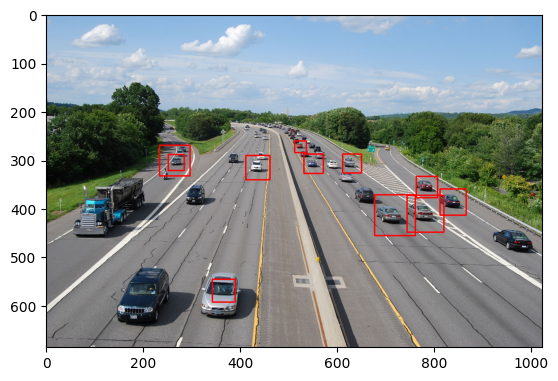

In [10]:
image = cv2.imread('local/787NorthEnd.JPG')
image = cv2.resize(image, (0, 0), fx = 0.4, fy = 0.4)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cars = cars_cascade.detectMultiScale(gray, 1.1, 1)

for (x,y,w,h) in cars:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
    

img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)   